In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


# Veri Hazırlığı

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from scipy import stats

In [3]:
df=pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


> **Veri setinden ilk 5 satır çağırıldı.. head() default 5 değeri ile gelir..**

In [5]:
# Sütun isimlerini özel bir dict kullanarak yeniden adlandırma
df.rename(columns={
    'approx_cost(for two people)': 'cost',
    'listed_in(type)': 'type',  
    'listed_in(city)': 'city'  
}, inplace=True)


df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.shape

(51717, 17)

> **Bazı sütun isimleri düzensiz olarak geldi. Modelleme aşamasında bir sıkıntı yaşama ihtimaline karşı isimleri yeniden adlandırıldı.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           51717 non-null  object
 1   address       51717 non-null  object
 2   name          51717 non-null  object
 3   online_order  51717 non-null  object
 4   book_table    51717 non-null  object
 5   rate          43942 non-null  object
 6   votes         51717 non-null  int64 
 7   phone         50509 non-null  object
 8   location      51696 non-null  object
 9   rest_type     51490 non-null  object
 10  dish_liked    23639 non-null  object
 11  cuisines      51672 non-null  object
 12  cost          51371 non-null  object
 13  reviews_list  51717 non-null  object
 14  menu_item     51717 non-null  object
 15  type          51717 non-null  object
 16  city          51717 non-null  object
dtypes: int64(1), object(16)
memory usage: 6.7+ MB


> **df.info() komutu ile veri çerçevesinin genel yapısı incelendi. Eksik değer sayıları, sütun isimleri, veri tipleri vb.**

In [8]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


> **Sayısal veri türündeki sütunlar için özet istatistikler hesaplandı.**

In [9]:
df.describe(include='object').T

,count,unique,top,freq
url,51717,51717,https://www.zomato.com/bangalore/jalsa-banasha...,1
address,51717,11495,Delivery Only,128
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
rate,43942,64,NEW,2208
phone,50509,14926,080 43334321,216
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182


> **Object veri türündeki sütunlar için özet istatistikler hesaplandı.**

In [10]:
# Gereksiz ve tekrar eden sütunları belirleme
columns_to_drop = [ 'url', 'phone']

#name: Modelleme için genellikle kullanılmaz.
#url: Modelleme için gereksizdir.

# Sütunları veri çerçevesinden çıkarma
df = df.drop(columns=columns_to_drop)

df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


> **Bir restoranın telefonu ve url adresi mantıken onun modelleme sürecindeki başarısına etki etmeyeceği için veri setinden kaldırıldı..**

In [11]:
df.shape

(51717, 15)

> **Veri setinin boyutuna genel bakış --> 51717 satır, 15 sütun..**

In [12]:
missing_values = df.isnull().sum()

In [13]:
missing_values_percent = (missing_values  / len(df)) * 100
print(missing_values_percent)

address          0.000000
name             0.000000
online_order     0.000000
book_table       0.000000
rate            15.033741
votes            0.000000
location         0.040606
rest_type        0.438927
dish_liked      54.291626
cuisines         0.087012
cost             0.669026
reviews_list     0.000000
menu_item        0.000000
type             0.000000
city             0.000000
dtype: float64


> **Bu noktada veri setinde null olan değerler bulundu. Bu değerler veri modelleme aşaması için sorun olabilecek değerler ve birçok farklı bakış açısıyla ele alınmalılar..**

> **Bakış açısı:: Eğer dish_liked sütunu verinin %55’inden fazlasını boş içeriyorsa, bu sütunu tamamen göz ardı edilebilir. Modelleme sürecinde bu sütunun etkili olmayacağı anlamına gelebilir.**

In [14]:
# 'dish_liked' sütununu DataFrame'den çıkarma
df.drop(['dish_liked'], axis=1, inplace=True)

df.head()


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [15]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

> **Date için benzersiz değerler saydırıldığında '-', 'NEW' gibi puan statüsüne uygun olmayan veriler göze çarpıyor. Bunların ele alınması lazım..**

In [16]:
# Örnek rate sütunu
df['rate'] = df['rate'].astype(str)  # rate sütununu string'e dönüştürülmektedir..

# 'NEW' veya 'nan' değerlerini None olarak işaretleme
df['rate'] = df['rate'].replace(['NEW', 'nan'], None)
df = df.loc[df.rate !='-'].reset_index(drop=True)

# '3.8/5' formatından sadece sayıyı çekmek için '/' öncesini alma
df['rate'] = df['rate'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else x)

# Sayısal değerlere dönüştürme
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

df['rate'].head()


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

> **NEW': Bu değer genellikle bir restoranın henüz bir değerlendirmesi olmadığı anlamına gelir. Modelleme ve analizde bu tür veriler genellikle anlamlı değildir. Bu yüzden None ile değiştirildi.
> '-': Bu değer genellikle eksik veya geçersiz bir değerlendirmeyi temsil eder. Bu yüzden bu değerler de temizlendi ve DataFrame'den çıkarıldı. Ve '/' ifadesi rate sütunumuzu object olarak gösterdiği için öncesindeki sayısal değer alınıp numeric bir değere dönüştürüldü. Bu da modelleme sürecinde istenilen şekilde kullanılmasını sağlayacaktır..**

In [17]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51648 entries, 0 to 51647
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       51648 non-null  object 
 1   name          51648 non-null  object 
 2   online_order  51648 non-null  object 
 3   book_table    51648 non-null  object 
 4   rate          41665 non-null  float64
 5   votes         51648 non-null  int64  
 6   location      51627 non-null  object 
 7   rest_type     51421 non-null  object 
 8   cuisines      51603 non-null  object 
 9   cost          51306 non-null  object 
 10  reviews_list  51648 non-null  object 
 11  menu_item     51648 non-null  object 
 12  type          51648 non-null  object 
 13  city          51648 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.5+ MB


> **Ve burada rate sütununun veri tipinin float64'e döndüğü görülüyor.**

In [19]:
# Boş değerleri olan satırları kaldırma
df = df.dropna(subset=['rate'])
df= df.dropna(subset=['location'])
df = df.dropna(subset=['cuisines'])
df= df.dropna(subset=['rest_type'])

print(df[['rate','location', 'cuisines', 'rest_type']].isnull().sum())



rate         0
location     0
cuisines     0
rest_type    0
dtype: int64


> **Nan değerlere Bakış açısı: nan değerler sayısal ise median, mean ile metinsel, string değerler ise mode ile doldurulabilir. Ya da bu değerler direkt veri setinden çıkarılabilir. Bu  durum eksik değerlerin modelleme aşamasına etkisine göre değişir. Bu nedenle tüm yöntemler denendi ve en başarılı sonuç bu değerlerin çıkarılmasıyla elde edildi. Bu nedenle bu durumla devam edildi..**

In [20]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800', nan,
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

>  **Cost sütununa bakınca, cost sütunundaki veriler sayısal olarak işlenemiyor çünkü bazı değerler sayısal olmayan formatta ('800', '2,000' gibi). Zaten dtype karşılığında object olarak görülüyordu. Bunun da nedeni bu sayede unique ile görülmüş oldu. Bu veriler de oncelikle orijinal sayısal değerlerine dönüştürüldü. Modelleme aşamasında bu önemli bir nokta.**

In [21]:
# Virgülleri kaldırıp sayısal formata dönüştürme
df['cost'] = df['cost'].str.replace(',', '').astype(float)

df = df.dropna(subset=['cost'])
print(df['cost'].isnull().sum())


0


> **Bu kod yapısında da cost sütununun object tipine dönüşmesini sağlayan '' ifadesi kaldırılıp sayısal değerlerimiz numeric tipe dönüştürüldü. Ve sonrasında eksik değerler kaldırıldı.**

In [22]:
missing_values = df.isnull().sum()
missing_values_percent = (missing_values  / len(df)) * 100
print(missing_values_percent)

address         0.0
name            0.0
online_order    0.0
book_table      0.0
rate            0.0
votes           0.0
location        0.0
rest_type       0.0
cuisines        0.0
cost            0.0
reviews_list    0.0
menu_item       0.0
type            0.0
city            0.0
dtype: float64


> **Nan değerlerin sayısı yeniden yazdırıldı. Görüldüğü üzere nan değerlerimiz ortadan kalkmış durumda.**

In [23]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [24]:
unique_values = df['rate'].unique()

print(unique_values)

[4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 2.9 3.5 2.6
 3.4 4.5 2.5 2.7 4.7 2.4 2.2 2.3 4.8 4.9 2.1 2.  1.8]


> **'rate' sütunumuzdaki benzersiz değerler yukarıda görüldüğü gibi.. Sınıflandırma için değerlerimizin bu şekil sayısal olması bizim için uygun değil, bu sütunlar kategorik verilere dönüştürüldü.**

In [25]:
# Kategorize etme
def categorize_rate(rate):
    if rate >= 4.0:
        return 'High'
    elif rate >= 2.5:
        return 'Medium'
    else:
        return 'Low'

# Kategorize etme
df['rate'] = df['rate'].map(categorize_rate)

> **Sınıflandırma için rate sütunundaki değerler 'High', 'Medium', 'Low' şeklinde kategorize edildi.**

In [26]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,High,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,High,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,Medium,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,Medium,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,Medium,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [27]:
#sayısal olmayan değerleri encode ederek sayısal formata dönüştürme
def Encode(df):
    for column in df.columns[~df.columns.isin(['cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())
df_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,0,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,0,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,1,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,1,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,1,166,1,0,4,600.0,4,0,0,0


> **Daha sonra, modelleme sürecinde sayısal olmayan tüm veriler sayısal değerlere dönüştürüldü, çünkü makine öğrenimi modelleri, verilerin sayısal formatta olmasını gerektirir.**

In [28]:
# Sadece sayısal sütunları seçme
numeric_df = df_en.select_dtypes(include='number')

# Aykırı değer oranlarını hesaplama
outlier_ratios = {}
total_outliers = 0
total_values = 0

for column in numeric_df.columns:
    data = numeric_df[column]
    
    # Z-Score hesaplama
    z_scores = stats.zscore(data)
    abs_z_scores = abs(z_scores)
    
    # Aykırı değerleri belirleme ( çoğunlukla z > 3 olanlar tercih edilmektedir..)
    outliers = abs_z_scores > 3
    
    # Aykırı değer oranını hesaplama
    num_outliers = outliers.sum()
    num_total = len(data)
    outlier_ratio = num_outliers / num_total
    
    # Her sütun için aykırı değer oranını saklama
    outlier_ratios[column] = outlier_ratio
    
    # Toplam aykırı değer ve veri noktası sayısını güncelleme
    total_outliers += num_outliers
    total_values += num_total

# Genel aykırı değer oranını hesaplama
overall_outlier_ratio = total_outliers / total_values

# Sonuçları yazdırma
#for column, ratio in outlier_ratios.items():
    #print(f"Sütun '{column}' için Aykırı Değer Oranı: {ratio:.2%}")

print(f"Toplam Aykırı Değer Sayısı: {total_outliers}")
print(f"Toplam Veri Noktası Sayısı: {total_values}")
print(f"Genel Aykırı Değer Oranı: {overall_outlier_ratio:.2%}")


Toplam Aykırı Değer Sayısı: 3935
Toplam Veri Noktası Sayısı: 577682
Genel Aykırı Değer Oranı: 0.68%


<!-- Aykırı değerler yok denecek kadar az. Modellemeye çok etki etmeyeceği için bazen bu değerleri tutabiliyoruz, ben de bu nedenle verileri tutuyorum..  --> 

> ## Aykırı Değerlerin Kaldırılmaması
> 
> **Aykırı değer tespitinde en çok kullanılan yöntem olan z-score kullanılmıştır.. Veri setimizde toplam 3935 aykırı değer tespit edilmiştir. Ancak, bu aykırı değerler toplam 577,682 veri noktası içerisinde yalnızca %0.68'lik bir oranı temsil etmektedir. Aykırı değerlerin bu kadar düşük bir orana sahip olması, veri setinin genel yapısını veya model performansını olumsuz etkileme olasılığını azaltmaktadır. Ayrıca, bazı aykırı değerler, veri setinin çeşitliliğini ve modelin gerçek dünya verilerine uyum sağlama yeteneğini artırabilir. Bu nedenle, aykırı değerlerin varlığı, modelin uç durumlara daha dayanıklı hale gelmesine katkıda bulunabilir. Aykırı değerlerin düşük oranı ve potansiyel katkıları göz önünde bulundurularak, aykırı değerleri kaldırmama kararı alınmıştır.**


#  Veri Analizi

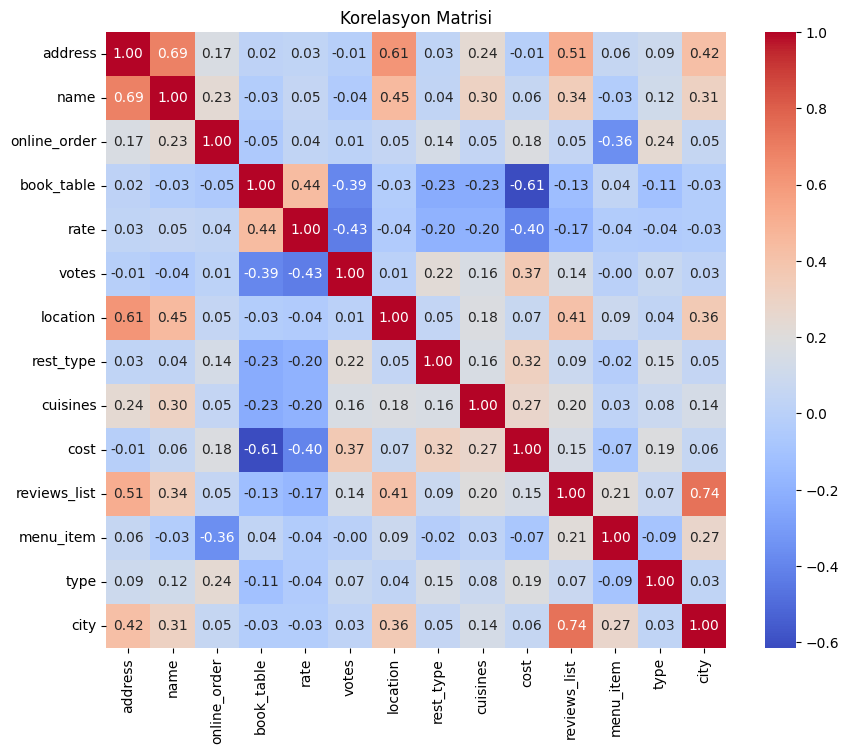

In [29]:
# Korelasyon matrisini oluşturma
correlation_matrix = df_en.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

> **Korelasyon analizi ile veriler arasındaki ilişkiler incelendi. Hangi sütunlar arasında güçlü bağlantılar olduğu incelendi. Örneğin 'rate' sütununun en güçlü bağı 0.44 ile 'book_table' sütunu ile olduğu görülmektedir. Değer 1'e yaklaştıkça güçlü bağ artmaktadır..**

In [30]:
df_en.describe(include='all')


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
count,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000
mean,3602.188425,2423.833943,0.343189,0.847224,0.706323,352.683179,29.328406,8.035940,503.263238,603.914063,8650.286552,1064.459855,2.806946,14.483169
std,2194.744361,1682.920671,0.474780,0.359776,0.465087,884.177761,20.307903,12.453704,576.938581,464.942973,6237.536238,2125.367114,1.170420,7.989769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,2071.000000,1006.000000,0.000000,1.000000,0.000000,21.000000,14.000000,2.000000,53.000000,300.000000,3133.000000,0.000000,2.000000,7.000000
50%,3434.000000,2151.000000,0.000000,1.000000,1.000000,73.000000,24.000000,2.000000,253.000000,500.000000,7400.000000,0.000000,2.000000,15.000000
75%,5134.000000,3490.000000,1.000000,1.000000,1.000000,277.000000,39.000000,9.000000,847.000000,750.000000,14110.500000,550.000000,4.000000,20.000000
max,8791.000000,6601.000000,1.000000,1.000000,2.000000,16832.000000,91.000000,86.000000,2366.000000,6000.000000,21102.000000,8242.000000,6.000000,29.000000


> **Tüm sütunları için özet istatistikler görüntülendi.**

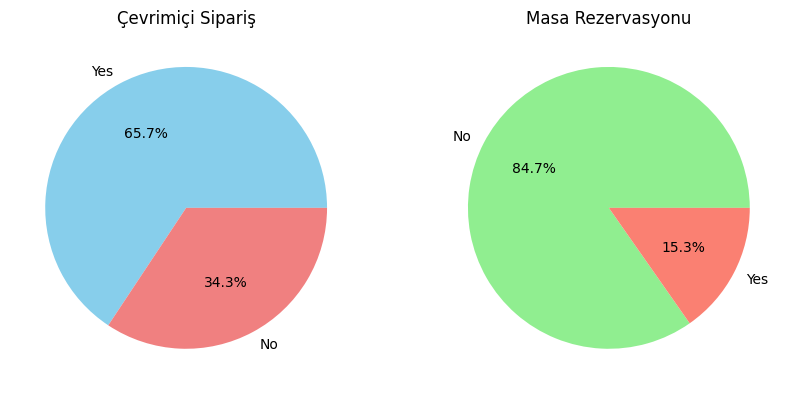

In [31]:
# 'online_order' sütunu için pasta grafiği
online_order_counts = df['online_order'].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(online_order_counts, labels=online_order_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Çevrimiçi Sipariş')

# 'book_table' sütunu için pasta grafiği
book_table_counts = df['book_table'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(book_table_counts, labels=book_table_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Masa Rezervasyonu')

plt.show()



> **Çevrim içi sipariş olup olmama durumuna bakmak için 'online_order' sütununa özel pasta grafiği çizdirildi.**

Text(0.5, 1.0, 'Bir Lokasyondaki Restoran Sayısı')

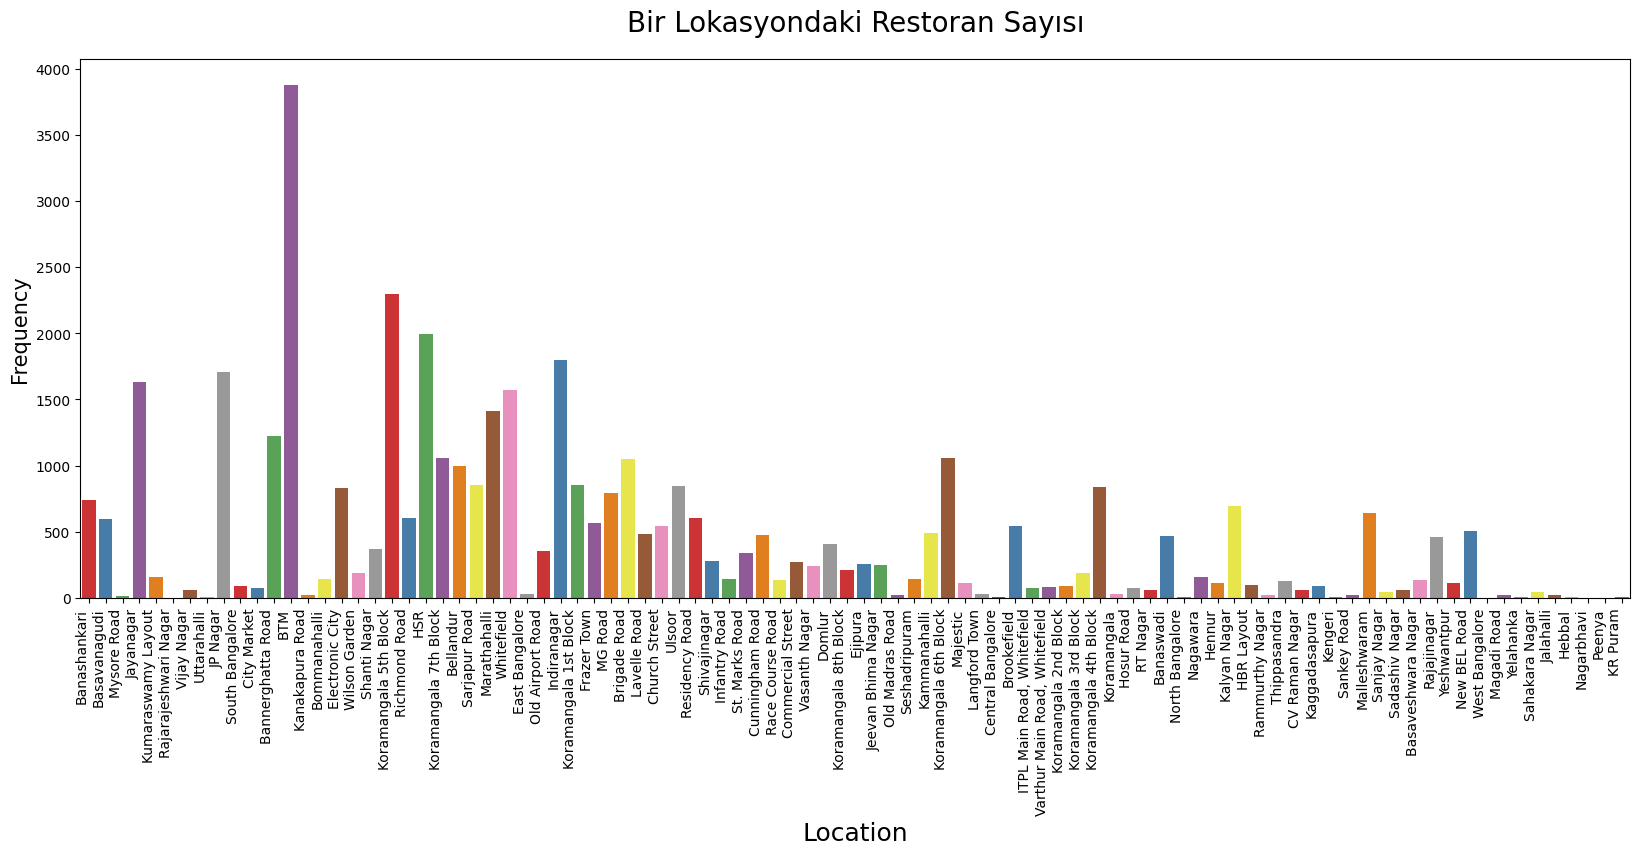

In [32]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('Bir Lokasyondaki Restoran Sayısı',size = 20,pad=20)

> **'location' sütunu ele alınarak tüm lokasyonlardaki restoran sıklığına bakıldı.. En fazla restoran BTM lokasyonunda görülmektedir.**

Text(0.5, 1.0, 'Restoran Tipi Sıklığı')

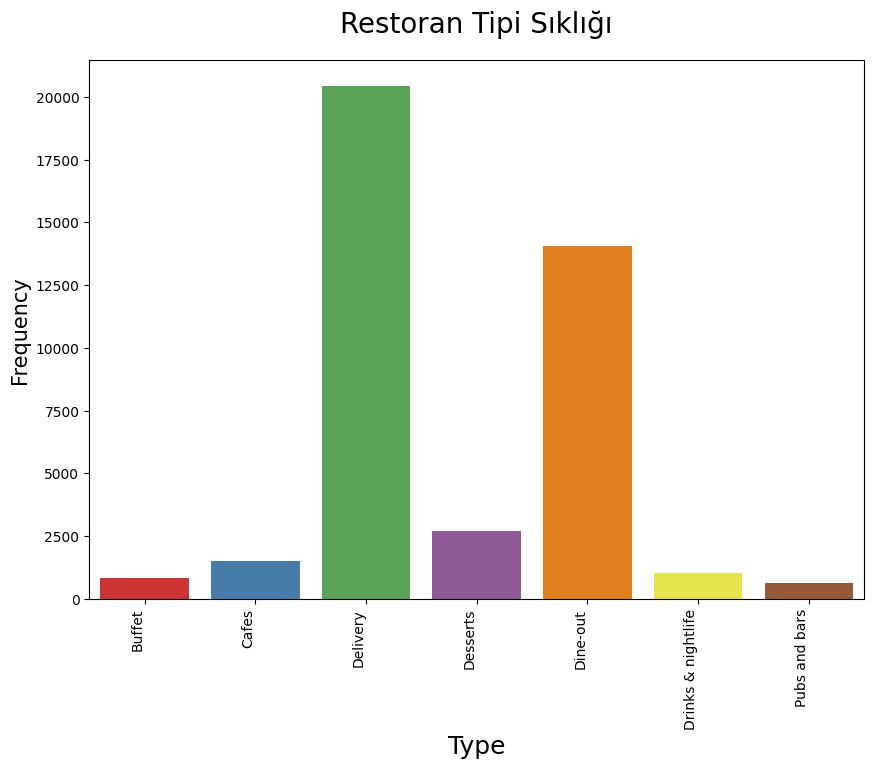

In [33]:
fig = plt.figure(figsize=(10,7))
loc = sns.countplot(x="type",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Type",size=18)
loc
plt.title('Restoran Tipi Sıklığı',size = 20,pad=20)

> **'type' sütunu ele alınarak tüm lokasyonlardaki restoran tipi sıklığına bakıldı.. En çok delivery en az pubs and bars tipi görülmektedir.**

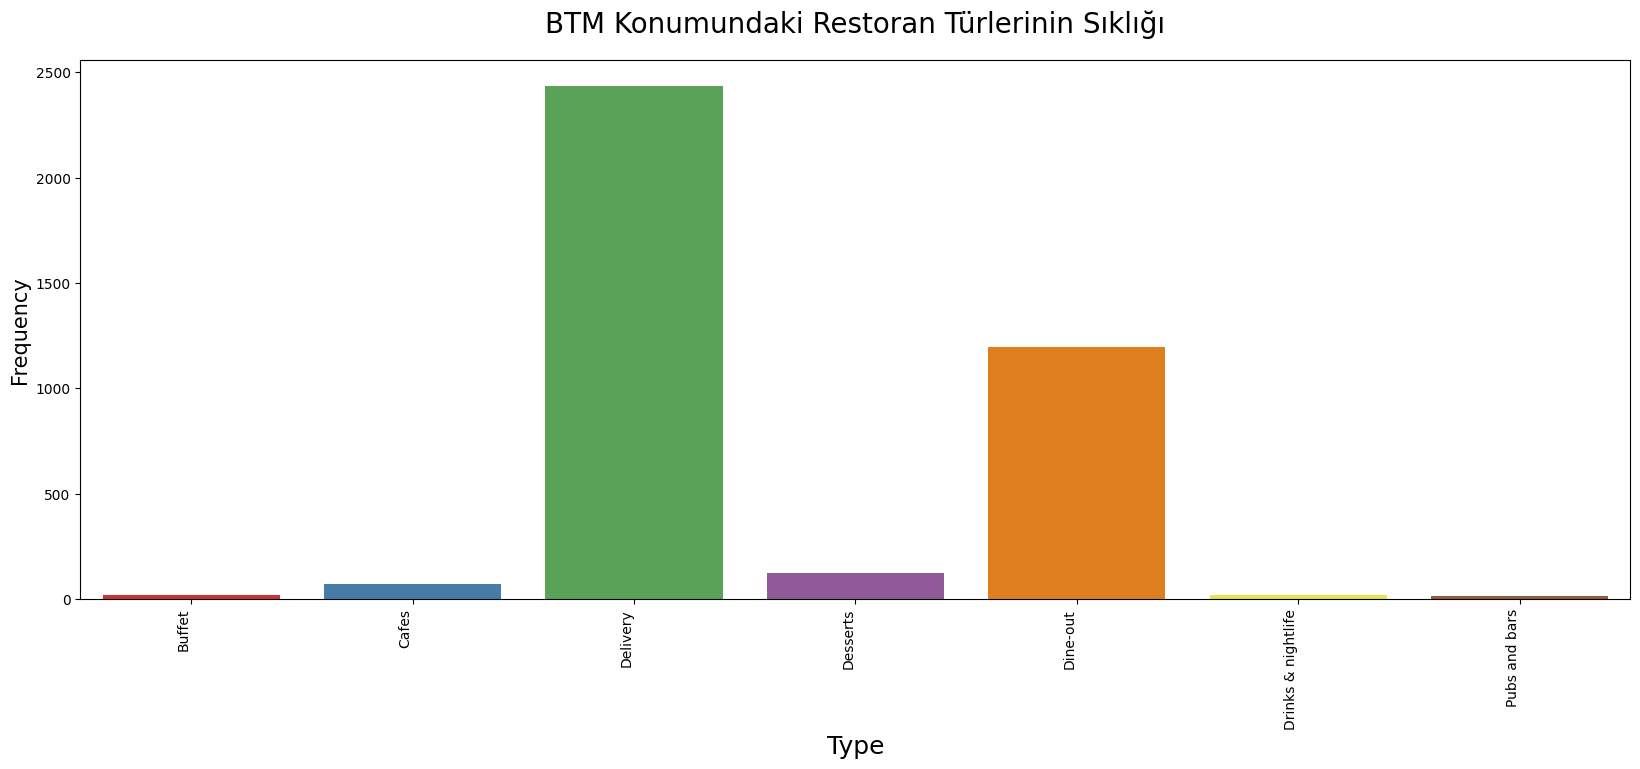

In [34]:
# "BTM" konumundaki verileri filtreleme
btm_data = df[df['location'] == 'BTM']


plt.figure(figsize=(20, 7))

# Seaborn countplot oluşturma
sns.countplot(x="type", data=btm_data, palette="Set1")


plt.xticks(rotation=90, ha="right")
plt.ylabel("Frequency", size=15)
plt.xlabel("Type", size=18)
plt.title('BTM Konumundaki Restoran Türlerinin Sıklığı', size=20, pad=20)

plt.show()


> **En çok restoran sayısına sahip BTM lokasyonu ele alınarak bu lokasyondaki restoran tipi sıklığına bakıldı. En çok delivery tipi görülürken buffet,Drinks & nightlife, pubs and bars türleri çok az görülmektedir.**

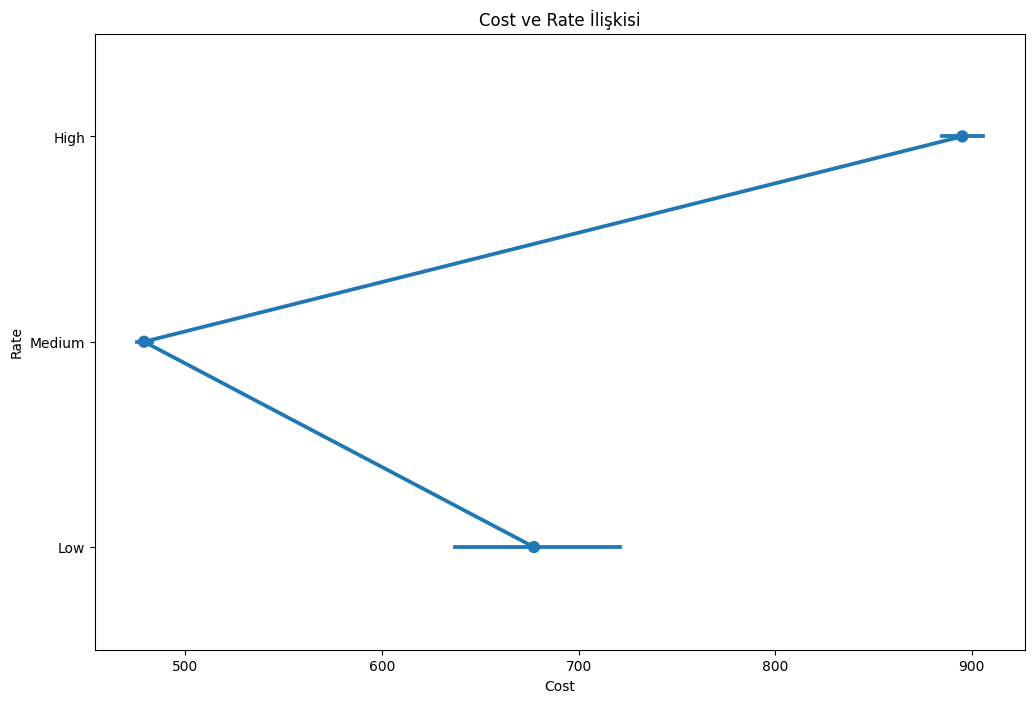

In [35]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='cost', y='rate', data=df, markers='o', linestyles='-')
plt.title('Cost ve Rate İlişkisi')
plt.xlabel('Cost')
plt.ylabel('Rate')
plt.show()


> **Cost ve rate için pointplot ilişkisine bakıldığında maliyet arttıkça restoran puanının da genel olarak arttığı görülmektedir. Bu da müşterilerin genellikle daha yüksek fiyatlı restoranların daha kaliteli hizmet ve lezzet sunduğunu düşünme eğiliminde olduğunu gösterebilir.**

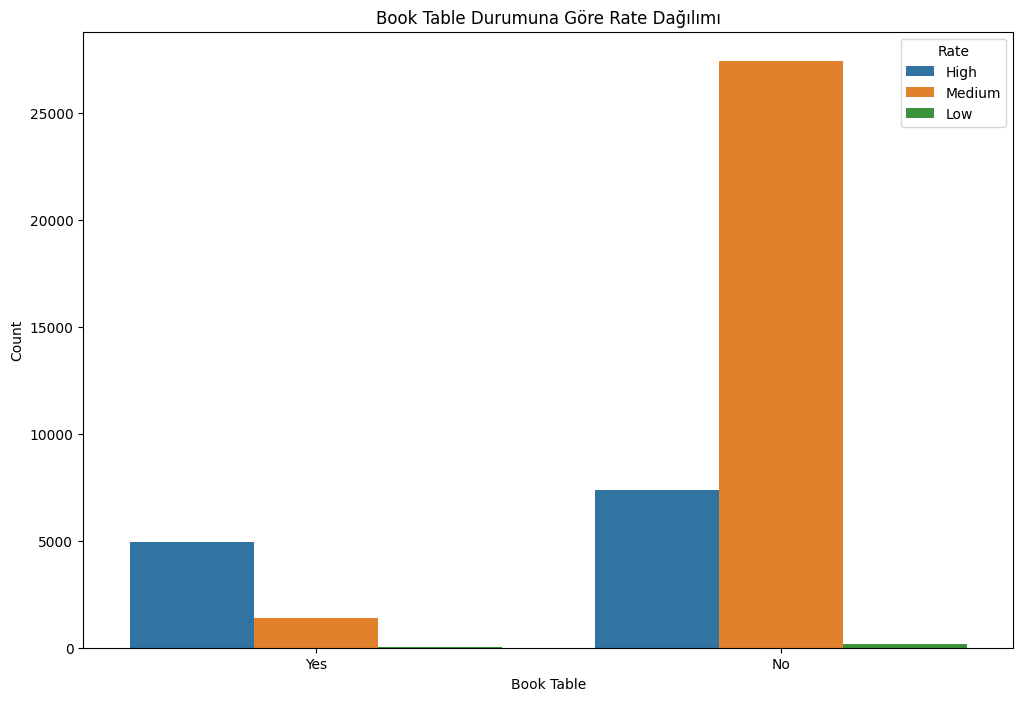

In [36]:
plt.figure(figsize=(12, 8))
sns.countplot(x='book_table', hue='rate', data=df)
plt.title('Book Table Durumuna Göre Rate Dağılımı')
plt.xlabel('Book Table')
plt.ylabel('Count')
plt.legend(title='Rate')
plt.show()


> **Masa rezervasyonu için rate dağılımına bakıldığında tüm kategoriler için (low, high, medium) masa rezervasyonu olmaması durumunun daha fazla puanlandığı görülmektedir.**

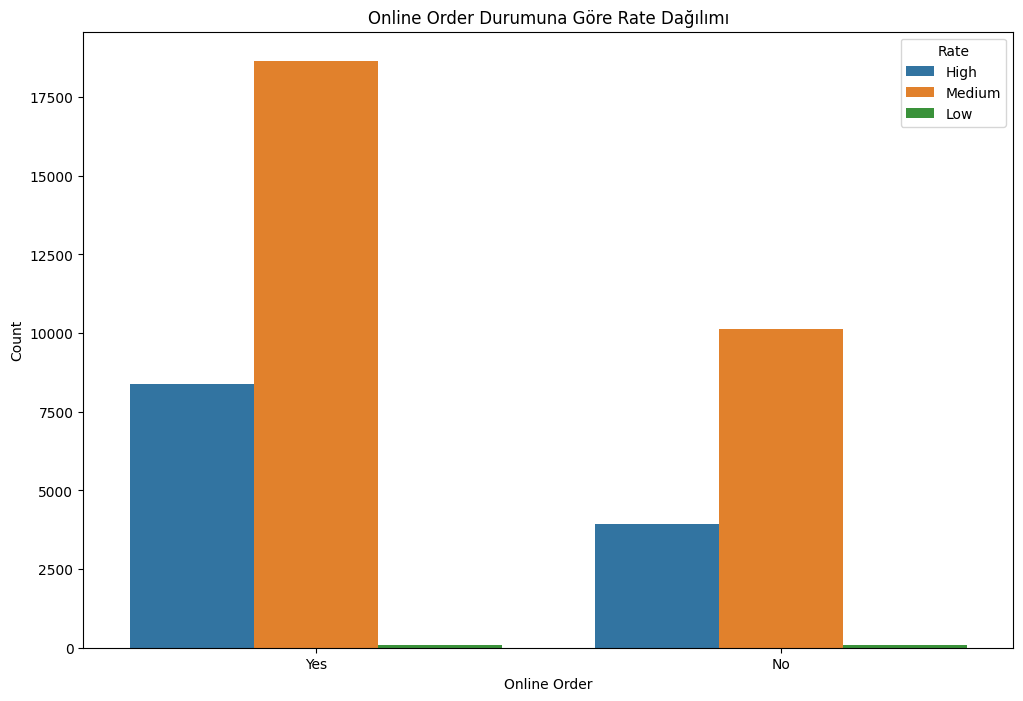

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(x='online_order', hue='rate', data=df)
plt.title('Online Order Durumuna Göre Rate Dağılımı')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.legend(title='Rate')
plt.show()


> **Çevrim içi sipariş için rate dağılımına bakıldığında high ve medium için  çevrimiçi sipariş olması durumunun daha fazla puanlandığı görülmektedir.**

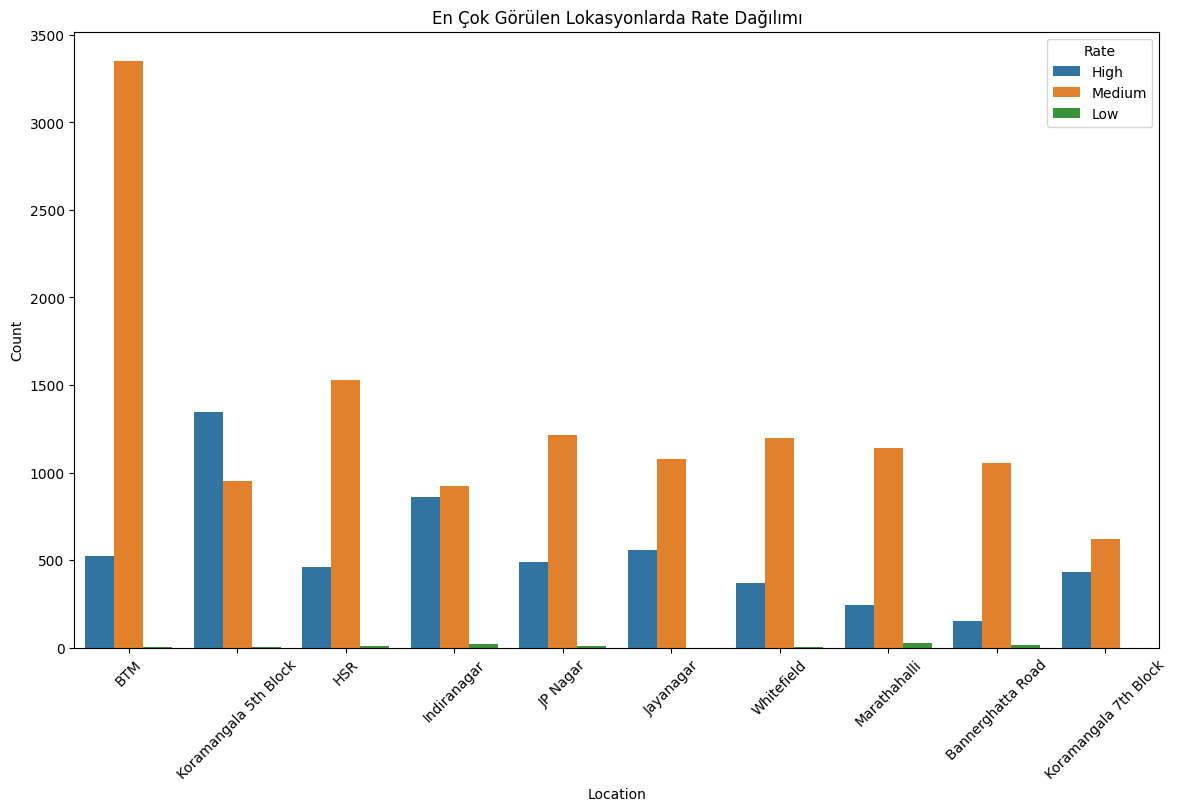

In [38]:
# Lokasyon başına toplam sayı
top_locations = df['location'].value_counts().nlargest(10).index

# Sadece en çok görülen lokasyonları içeren alt veri kümesi
top_locations_df = df[df['location'].isin(top_locations)]

plt.figure(figsize=(14, 8))
sns.countplot(x='location', hue='rate', data=top_locations_df, order=top_locations)
plt.title('En Çok Görülen Lokasyonlarda Rate Dağılımı')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rate')
plt.show()


> **En çok görülen lokasyonlardaki rate dağılımına bakınca ise; high değerinin en çok Koramangala 5th Block lokasyonunda, low değerinin ise en çok Marathahalli ve Indiranagar lokasyonlarında olduğu görülmektedir.**

# Modelleme

> **Modelleme aşamasında karar ağacı sınıflandırıcı algoritması kullanarak bir model oluşturuldu, eğitildi ve değerlendirildi. İlk olarak, veri setindeki özellikler (X_class) ve hedef değişken (y_class) belirlendi [Sınıflandırma işlemi bir restoranın aldığı puana göre yapılmak istendiğinden burada hedef değişkenimiz 'rate' olarak seçildi. 'rate' (y_class) değişkenine atandı ve hedef değişken olarak modelin tahmin etmeye çalıştığı sonuç olduğu için, özellikler setinden (X_class) çıkarıldı.], ardından veri seti eğitim ve test setlerine ayrıldı. Karar ağacı modeli, eğitim verileri üzerinde eğitildi ve bu model ile test verileri üzerinde tahminler yapıldı. Son olarak, modelin başarısını ölçmek için doğruluk, kesinlik, geri çağırma ve F1 skoru hesaplandı. Ayrıca, modelin performansı hakkında daha detaylı bilgi sağlayan bir sınıflandırma raporu oluşturuldu.**

In [39]:
# Rastgele Orman
# Özellikleri ve hedef değişkeni ayırma
X_class = df_en.drop('rate', axis=1)
y_class = df_en['rate']
# Eğitim ve test setlerine ayırma
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_class, y_train_class)

# Tahmin yapma
y_pred_class = rf_model.predict(X_test_class)

# Modeli değerlendirme
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print(f"Random Forest - Accuracy: {accuracy}")
print(f"Random Forest - Precision: {precision}")
print(f"Random Forest - Recall: {recall}")
print(f"Random Forest - F1 Score: {f1}")

report = classification_report(y_test_class, y_pred_class)
print(f"Random Forest - Classification Report:\n{report}")

Random Forest - Accuracy: 0.9810977826245002
Random Forest - Precision: 0.9811168202469982
Random Forest - Recall: 0.9810977826245002
Random Forest - F1 Score: 0.9810137640940118
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2468
           1       0.98      0.99      0.99      5747
           2       1.00      0.87      0.93        38

    accuracy                           0.98      8253
   macro avg       0.99      0.94      0.96      8253
weighted avg       0.98      0.98      0.98      8253



> **Modelleme aşamasında daha sobra random forest sınıflandırıcı algoritması kullanarak bir model oluşturuldu, eğitildi ve değerlendirildi. İlk olarak, veri setindeki özellikler (X_class) ve hedef değişken (y_class) belirlendi [Sınıflandırma işlemi bir restoranın aldığı puana göre yapılmak istendiğinden burada hedef değişkenimiz 'rate' olarak seçildi. 'rate' (y_class) değişkenine atandı ve hedef değişken olarak modelin tahmin etmeye çalıştığı sonuç olduğu için, özellikler setinden (X_class) çıkarıldı.], ardından veri seti eğitim ve test setlerine ayrıldı. Random forest modeli, eğitim verileri üzerinde eğitildi ve bu model ile test verileri üzerinde tahminler yapıldı. Son olarak, modelin başarısını ölçmek için doğruluk, kesinlik, geri çağırma ve F1 skoru hesaplandı. Ayrıca, modelin performansı hakkında daha detaylı bilgi sağlayan bir sınıflandırma raporu oluşturuldu.**

> **Görülen üzere aykırı değerler için  de şunu diyebiliriz --> Düşük Etki: %0.68 aykırı değer oranı modelimizin genel performansını büyük ölçüde etkilememiş gibi görümektedir..  Bu da aykırı değer için bazı durumlarda korumanın mantıklı olabileceğini göstermektedir. Aykırı değer kısmında açıkladığımız gibi..**

# GENEL ÇIKARIM

1.  Gereksiz sütunlar veri setinden çıkarıldı. Bu sütunlar bize modelleme aşamasında bilgi vermeyeceği ve modellememize etki etmeyeceği için veri setinden bu sütunlar çıkarıldı.
2.  Nan değerine sahip veriler veri setinden çıkarıldı. Bu aşamada mode, median, mean gibi birçok yöntem denendi. Ve model en iyi sonucu bu değerlerin veri setinden çıkarılması ile verdi.
3.  Bu aşamada amaç restoranları puanlarına göre sınıflandırmaktı. Bu nedenle bu değişkenimizin kategorik olması gerekmektedir. Bu amaç doğrultusunda rate sütunu 'high', 'low', 'medium' olarak kategorize edildi.
4.  Modelleme aşamasına geçmeden önce tüm verilerimizin numeric olması gerekmektedir. Bu nedenle encoder yöntemi ile tüm verilerimiz mumeric tipe  dönüştürüldü.
5. Aykırı değerler z-score yöntemi ile incelendi.Bu yöntemle veri setimizde %0.68'lik bir oranda aykırı değer bulundu. Bu  nedenle aykırı değerlerin düşük oranı ve potansiyel katkıları göz önünde bulundurularak, aykırı değerleri kaldırmama kararı alınmıştır.
6. Daha sonra modelle aşamasına geçildi. Modelleme aşamasında parametrelerle oynamak yerine 2 farklı model tercih edildi. Bu modeller sınıflandırma aşamasında yaygın kullanılan decision tree ve random forest.. Decision tree ve random forest modellerinde gayet başarılı sonuçlar alındı fakat random forest decision tree modeline göre daha başarılı sonuç elde etti. Hedef değişkenimiz 3 sınıflı bir değişkendi elde edilen sonuçlar şu şekildedir: 

 KARAR AĞACI (DECISION TREE)

Sınıf 0(Hight -- Yüksek Puan için sınıf):
Kesinlik: %95.0, modelin sınıf 0 için pozitif tahminlerde bulunma doğruluğunu gösterir.
Geri Çağırma: %95.0, modelin sınıf 0'ın gerçek örneklerini ne kadar iyi tespit ettiğini belirtir.
F1 Skoru: %95.0, kesinlik ve geri çağırma arasındaki dengeyi yansıtır.
Sınıf 1 (Medium -- Ortalama Puan için sınıf):
Kesinlik: %98.0, modelin sınıf 1 için tahminlerde bulunma doğruluğu çok yüksektir.
Geri Çağırma: %98.0, modelin sınıf 1'in gerçek örneklerini tespit etme başarısı çok yüksektir.
F1 Skoru: %98.0, kesinlik ve geri çağırma arasındaki dengeli performansı ifade eder.
Sınıf 2 (Low -- Düşük Puan için sınıf):
Kesinlik: %88.0, modelin sınıf 2 için pozitif tahminlerde bulunma doğruluğu diğer sınıflardan biraz daha düşüktür.
Geri Çağırma: %95.0, modelin sınıf 2'nin gerçek örneklerini tespit etme başarısı oldukça yüksektir.
F1 Skoru: %91.0, kesinlik ve geri çağırma arasındaki dengeyi yansıtır, ancak düşük kesinlik nedeniyle diğer sınıflardan daha düşük bir F1 skoru vardır.

Ortalama Performans:
Macro Average: Her sınıfın metriklerinin ortalamasıdır ve sınıflar arasındaki dengesizlikleri göz önüne alır. Burada, kesinlik %94.0, geri çağırma %96.0 ve F1 skoru %95.0'dir. Bu, genel performansı gösterir, ancak sınıf 2'nin etkisi daha belirgindir.
Weighted Average: Her sınıfın destek (örnek sayısı) ağırlığına göre ortalaması alınır. Burada, kesinlik, geri çağırma ve F1 skoru %97.0 civarındadır. Bu, modelin genel performansını sınıf dengesizlikleriyle birlikte değerlendirir.
Genel olarak, model yüksek doğruluk, kesinlik ve geri çağırma ile başarılı bir performans sergiliyor. Ancak, sınıf 2'nin daha düşük kesinlik skoru, modelin bu sınıfa ait örnekleri tanımada bazı zorluklar yaşadığını gösteriyor.*

 Rastgele Orman (RANDOM FOREST)

Sınıf 0:
Kesinlik: %98.0, modelin sınıf 0 için pozitif tahminlerde bulunma doğruluğunu gösterir.
Geri Çağırma: %96.0, modelin sınıf 0'ın gerçek örneklerini ne kadar iyi tespit ettiğini belirtir.
F1 Skoru: %97.0, kesinlik ve geri çağırma arasındaki dengeyi yansıtır.
Sınıf 1:
Kesinlik: %98.0, modelin sınıf 1 için tahminlerde bulunma doğruluğu oldukça yüksektir.
Geri Çağırma: %99.0, modelin sınıf 1'in gerçek örneklerini tespit etme başarısı çok yüksektir.
F1 Skoru: %99.0, kesinlik ve geri çağırma arasındaki dengeli performansı ifade eder.
Sınıf 2:
Kesinlik: %100, modelin sınıf 2 için tahminlerde bulunma doğruluğu mükemmel seviyededir.
Geri Çağırma: %87.0, modelin sınıf 2'nin gerçek örneklerini tespit etme başarısı biraz daha düşüktür.
F1 Skoru: %93.0, kesinlik ve geri çağırma arasındaki dengeyi yansıtır ve diğer sınıflardan biraz daha düşüktür.

Ortalama Performans:
Macro Average: Burada, kesinlik %99.0, geri çağırma %94.0 ve F1 skoru %96.0'dır. Bu, modelin genel performansını ve sınıflar arasındaki dengesizlikleri göz önüne alır.
Weighted Average: Burada, kesinlik, geri çağırma ve F1 skoru %98.0 civarındadır. Bu, modelin genel performansını sınıf dengesizlikleriyle birlikte değerlendirir.
Sonuç olarak, Random Forest modeli çok yüksek doğruluk, kesinlik, geri çağırma ve F1 skorları gösteriyor. Sınıf 2'deki geri çağırma oranı diğer sınıflardan biraz daha düşük olsa da, model genel olarak mükemmel performans sergiliyor. Bu nedenle tercih edilen model random forest modelidir.**

!!Rastgele ormanlar karar ağaçlarının güçlü yönlerini bir araya getirerek aşırı öğrenme durumuna engel olur ve daha güvenilir sonuçlar elde etmesini sağlar. Bu nedenle, genellikle başlangıçta karar ağaçları ile başlanır ve daha sonra rastgele ormanlar gibi ansamble yöntemlerle performans değerlendirilir. Proje de aşamasında da önce karar ağaçları daha sonra rastgele orman yöntemi kullanarak ilerlendi..







